### Project Super Store

#### In this project the Regional Sales manager for the South asks you to run a report for the following:

#### Which State in the South  region produced the highest profit ?

#### Whats the highest selling category ?

#### Whats the highest selling sub-category ?

#### Whats the worst selling Category ?

#### Where do we rank in sales amongst the other regions ?





In [125]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


##### How many rows and columns are in this dataset?

In [17]:
df.shape

(9994, 13)

##### What are the Data types for each column ?

In [18]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

##### Are there any duplicate values in this data set ? 

In [19]:
df.duplicated().sum()


17

##### Drop any duplicate values from the dataset

In [20]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(9977, 13)

##### Are there any null values in this dataset?

In [21]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

##### Filter out the df to only show data from the south region 

In [22]:
south=df.loc[df['Region']=='South',] # Created a variable to only show datain the southern region
south.Region.unique()

array(['South'], dtype=object)

##### How many sales were made in the South region ?

In [23]:
south.Region.value_counts()

South    1620
Name: Region, dtype: int64

##### Whats the total profit for the sales region ?

In [24]:
south.Profit.sum().round(decimals=2)

46749.43

##### Which State in the south had the highest profit ?

In [25]:
south.groupby("State")[['Profit']].sum().sort_values(by='Profit',ascending=False)

,Profit
State,
Virginia,18597.9504
Georgia,16250.0433
Kentucky,11199.6966
Alabama,5786.8253
Arkansas,4008.6871
Mississippi,3172.9762
Louisiana,2196.1023
South Carolina,1769.0566
Florida,-3399.3017


###### What was the highest selling category in the south ?

In [26]:
south.groupby("Category")[['Profit']].sum().sort_values(by='Profit',ascending=False).round(decimals=2)

,Profit
Category,
Technology,19991.83
Office Supplies,19986.39
Furniture,6771.21


##### Whats percentage did each category make up of the total profit ?¶

In [95]:
((south.groupby("Category")[['Profit']].sum().sort_values(by='Profit',ascending=False).round(decimals=2)/south_total)*100).round(decimals=2).rename(columns={"Profit":"% of Total_Profit"})

,% of Total_Profit
Category,
Technology,42.76
Office Supplies,42.75
Furniture,14.48


###### What was the highest selling sub-category in the south ?

In [27]:
south.groupby("Sub-Category")[['Profit']].sum().sort_values(by='Profit',ascending=False).round(decimals=2)

,Profit
Sub-Category,
Phones,10767.28
Accessories,7004.54
Chairs,6612.09
Paper,5947.06
Appliances,4123.94
Binders,3900.66
Copiers,3658.91
Furnishings,3442.68
Storage,2274.30


##### What was the highest selling sub-category in the south by Category ?

In [71]:
south.groupby(["Category","Sub-Category"])[['Profit']].sum().sort_values(by=["Category",'Profit'],ascending=[True,False]).round(decimals=2)

Profit
Category        Sub-Category          
Furniture       Chairs         6612.09
                Furnishings    3442.68
                Bookcases      1339.49
                Tables        -4623.06
Office Supplies Paper          5947.06
                Appliances     4123.94
                Binders        3900.66
                Storage        2274.30
                Envelopes      1465.48
                Art            1058.59
                Labels         1040.77
                Fasteners       173.72
                Supplies          1.88
Technology      Phones        10767.28
                Accessories    7004.54
                Copiers        3658.91
                Machines      -1438.89

##### Whats the  the average profit and quantity of each sub-category sorted by Category and Profit ?


In [94]:
south.groupby(["Category","Sub-Category"])[['Profit','Quantity']].mean().round(decimals=2).sort_values(by=['Category','Profit'],ascending=[True,False])

Profit  Quantity
Category        Sub-Category                  
Furniture       Chairs         75.14      3.76
                Bookcases      47.84      4.21
                Furnishings    20.86      3.73
                Tables        -90.65      4.45
Office Supplies Appliances     50.91      3.62
                Envelopes      27.14      3.81
                Paper          26.91      3.85
                Storage        17.77      3.81
                Labels         16.01      3.32
                Binders        15.86      3.99
                Art             7.45      3.85
                Fasteners       5.99      4.34
                Supplies        0.06      3.17
Technology      Copiers       522.70      3.71
                Phones         76.91      3.76
                Accessories    54.72      3.94
                Machines      -79.94      3.44

##### How do we compare to the other regions Profit ?

In [101]:
df.groupby('Region').Profit.sum().sort_values(ascending=False).round(decimals=2)

Region
West       108329.81
East        91506.31
South       46749.43
Central     39655.88
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Region'>

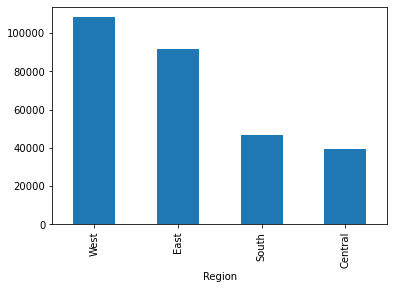

In [154]:
df.groupby('Region').Profit.sum().sort_values(ascending=False).round(decimals=2).plot(kind='bar')

##### How do we compare to the other regions Sales ?

In [103]:
df.groupby('Region').Category.count().sort_values(ascending=False).round(decimals=2)

Region
West       3193
East       2845
Central    2319
South      1620
Name: Category, dtype: int64

<AxesSubplot:xlabel='Region'>

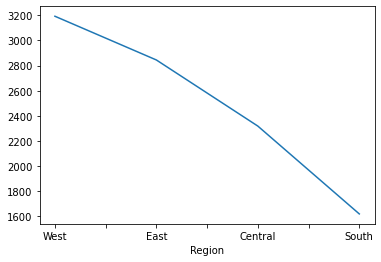

In [151]:
df.groupby('Region').Category.count().sort_values(ascending=False).round(decimals=2).plot.line()

##### How do we compare to the other regions sales totals ?

In [140]:
df.groupby('Region').Sales.sum().round(decimals=2).sort_values(ascending=False)

Region
West       725255.64
East       678435.20
Central    500782.85
South      391721.91
Name: Sales, dtype: float64

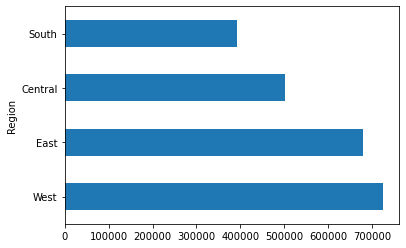

In [159]:
df.groupby('Region').Sales.sum().round(decimals=2).sort_values(ascending=False).plot(kind='barh')
plt.xlabel=("Sales_Total")

##### Export Df into a CSV file called "Superstore_Final"

In [ ]:
df.to_csv('Superstore_Final.csv')

##### Link to Tableau Dashboard:

##### https://public.tableau.com/authoring/SuperStoreDashboard_16573367878550/Dashboard1#1